# Preliminary Analysis

## Load data

In [2]:
# data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# visualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
 
from utils import read_data

dataset = read_data(normalize = False)
df = dataset.all_df

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv


In [ ]:
df.head(10)

In [ ]:
df.describe()

In [3]:
# Check data types
print(df.dtypes)

PM2.5                float64
PM10                 float64
SO2                  float64
NO2                  float64
CO                   float64
O3                   float64
TEMP                 float64
PRES                 float64
DEWP                 float64
RAIN                 float64
WSPM                 float64
station               object
time_stamp    datetime64[ns]
WD_E                   uint8
WD_ENE                 uint8
WD_ESE                 uint8
WD_N                   uint8
WD_NE                  uint8
WD_NNE                 uint8
WD_NNW                 uint8
WD_NW                  uint8
WD_S                   uint8
WD_SE                  uint8
WD_SSE                 uint8
WD_SSW                 uint8
WD_SW                  uint8
WD_W                   uint8
WD_WNW                 uint8
WD_WSW                 uint8
dtype: object


In [4]:
# Check no null rows
df.isnull().sum()

PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
WSPM          0
station       0
time_stamp    0
WD_E          0
WD_ENE        0
WD_ESE        0
WD_N          0
WD_NE         0
WD_NNE        0
WD_NNW        0
WD_NW         0
WD_S          0
WD_SE         0
WD_SSE        0
WD_SSW        0
WD_SW         0
WD_W          0
WD_WNW        0
WD_WSW        0
dtype: int64

## Data Distribution (Without normalization)

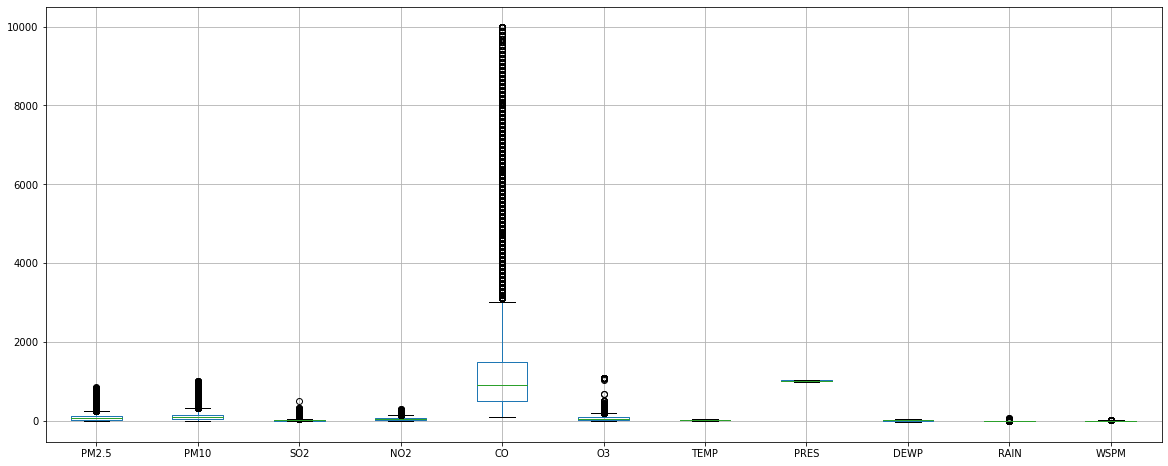

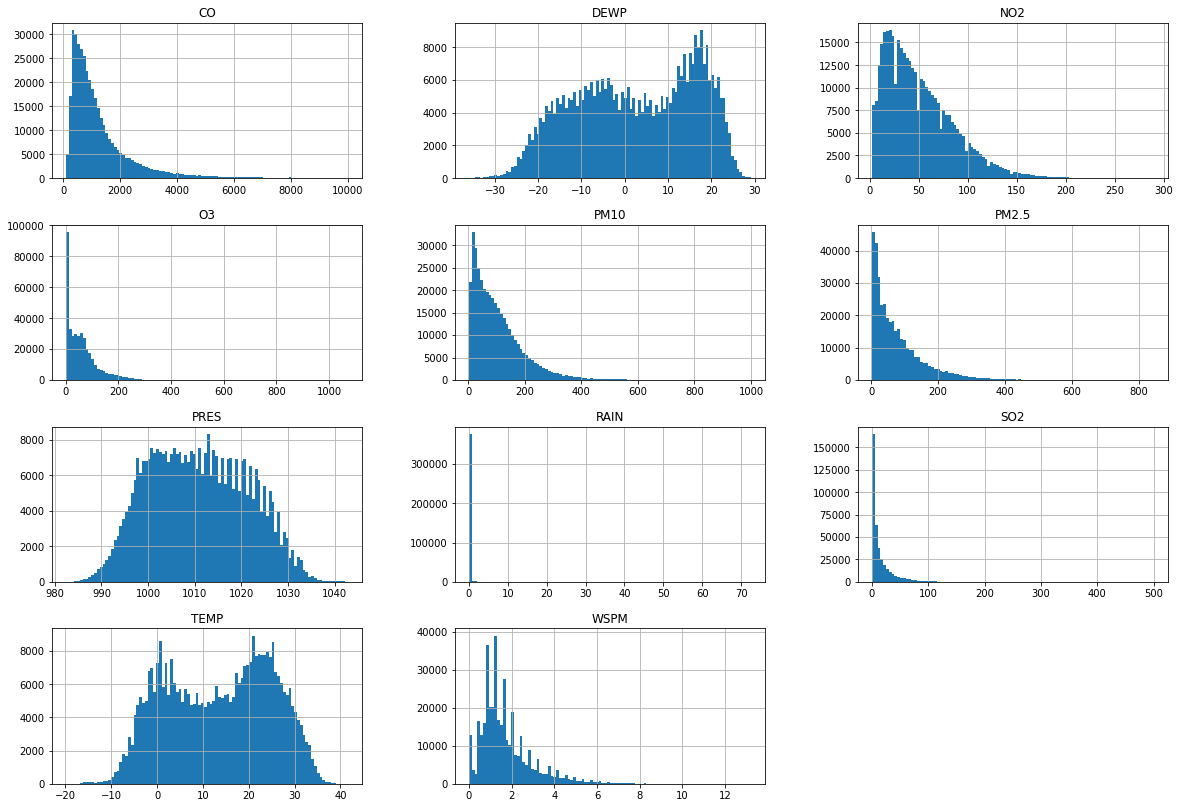

In [5]:
columns_for_plot = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df.boxplot(column = columns_for_plot,figsize=[20,8])
df.hist(bins=100,column = columns_for_plot,figsize=[20,14]);

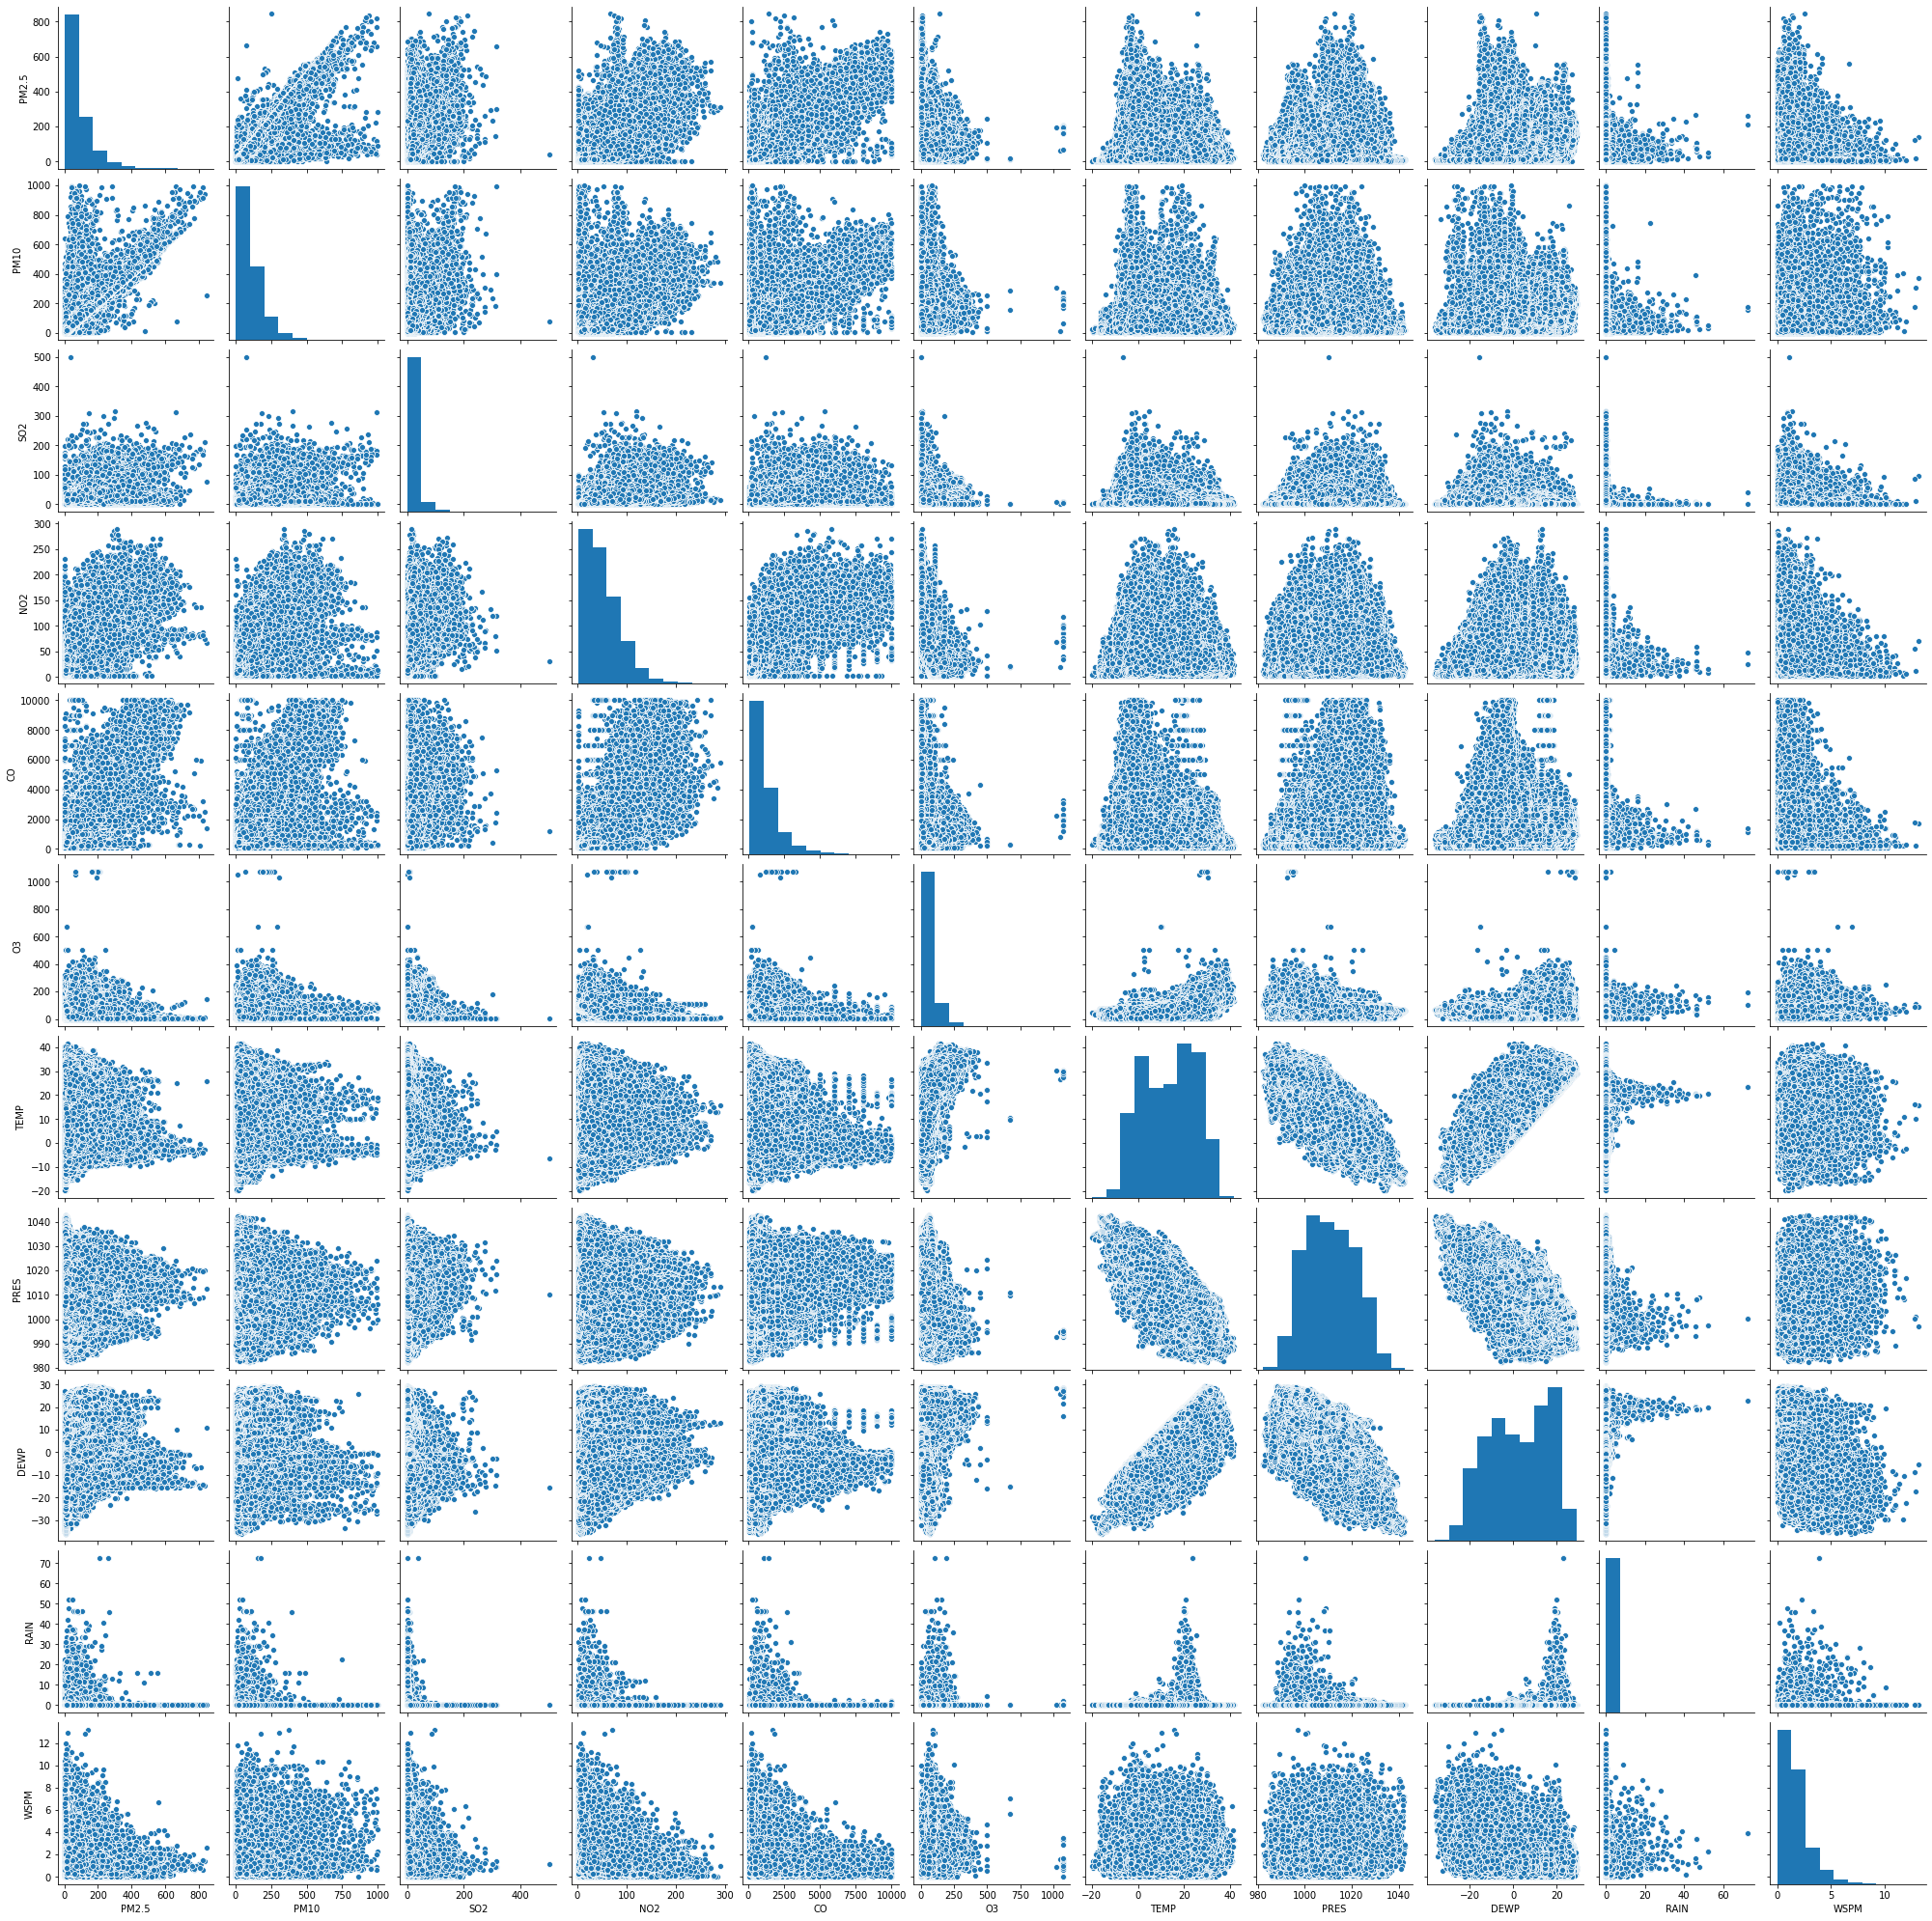

In [6]:
sns.pairplot(df, vars=columns_for_plot)

## Data Distribution (With normalization)

Loaded  data/PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data/PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data/PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data/PRSA_Data_Changping_20130301-20170228.csv
Loaded  data/PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data/PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data/PRSA_Data_Wanshouxigong_20130301-20170228.csv
Loaded  data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data/PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data/PRSA_Data_Shunyi_20130301-20170228.csv
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


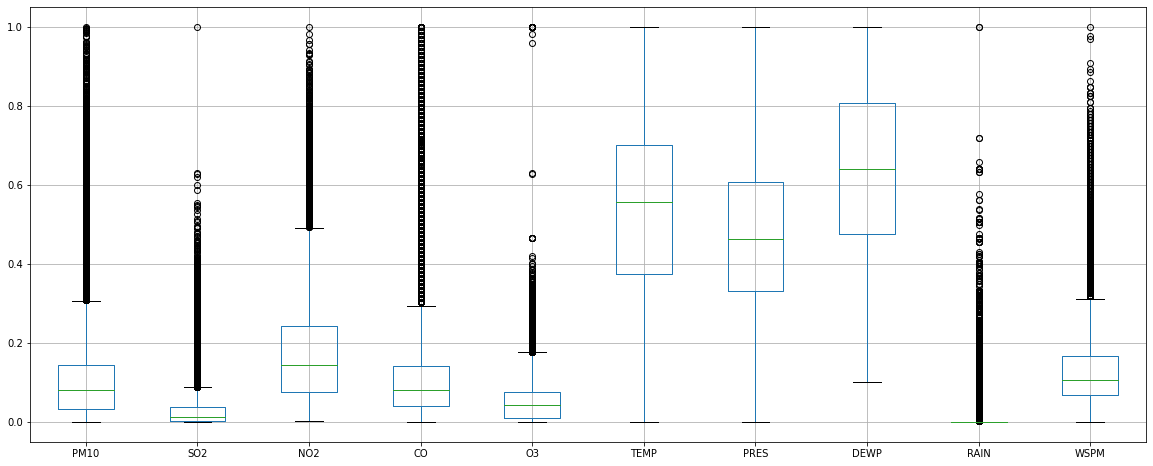

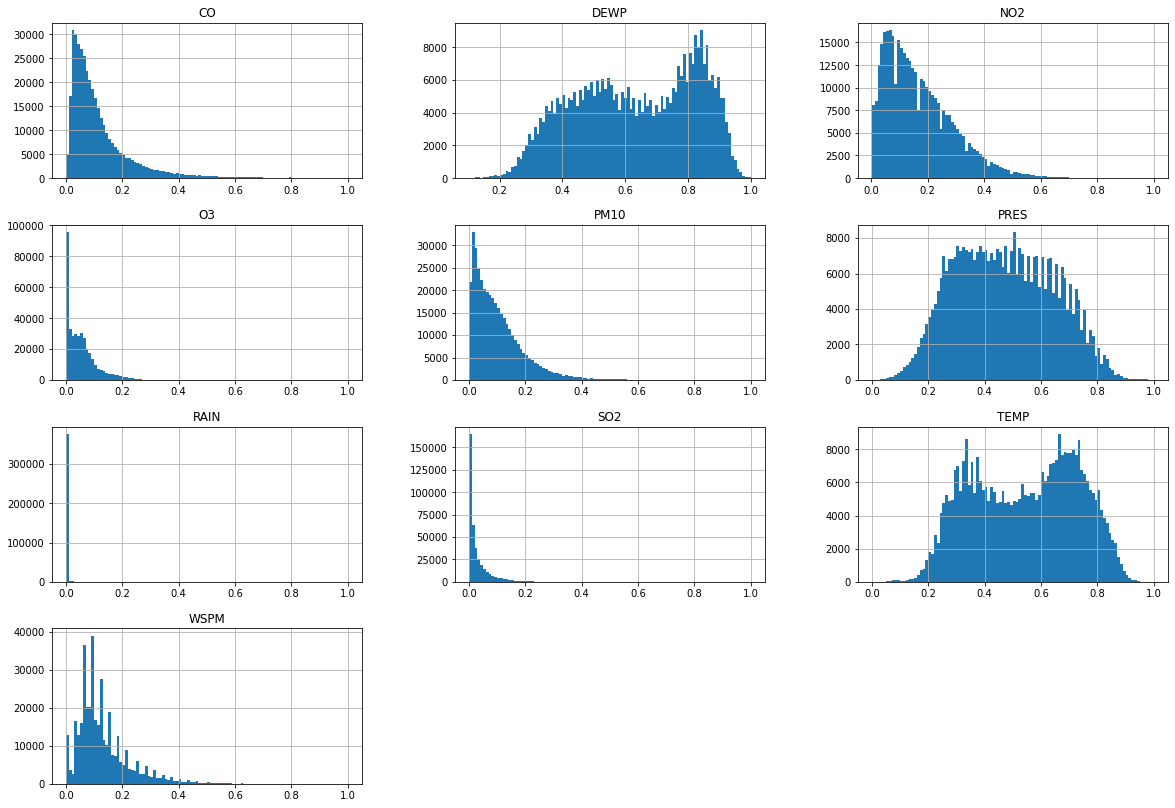

In [7]:
dataset_norm = read_data()
df_norm = dataset_norm.all_df
columns_for_plot = ['PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df_norm.boxplot(column = columns_for_plot,figsize=[20,8])
df_norm.hist(bins=100,column = columns_for_plot,figsize=[20,14]);

In [8]:
## Correlation Coefficient wrt PM2.5

In [9]:
df.corr()['PM2.5']

PM2.5     1.000000
PM10      0.884324
SO2       0.482209
NO2       0.670753
CO        0.792041
O3       -0.151149
TEMP     -0.128907
PRES      0.013717
DEWP      0.118009
RAIN     -0.015268
WSPM     -0.275686
WD_E      0.075126
WD_ENE    0.066978
WD_ESE    0.068931
WD_N     -0.044709
WD_NE     0.025031
WD_NNE   -0.030502
WD_NNW   -0.083252
WD_NW    -0.102491
WD_S      0.027039
WD_SE     0.046943
WD_SSE    0.037291
WD_SSW    0.014006
WD_SW    -0.000453
WD_W     -0.013926
WD_WNW   -0.072002
WD_WSW   -0.006225
Name: PM2.5, dtype: float64

In [10]:
# correlation coefficient among variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
PM2.5,1,0.88,0.48,0.67,0.79,-0.15,-0.13,0.014,0.12,-0.015,-0.28,0.075,0.067,0.069,-0.045,0.025,-0.031,-0.083,-0.1,0.027,0.047,0.037,0.014,-0.00045,-0.014,-0.072,-0.0062
PM10,0.88,1,0.47,0.65,0.7,-0.11,-0.095,-0.022,0.073,-0.027,-0.19,0.058,0.047,0.057,-0.047,0.0049,-0.042,-0.078,-0.084,0.029,0.046,0.039,0.024,0.017,-0.0058,-0.051,0.0036
SO2,0.48,0.47,1,0.5,0.54,-0.17,-0.32,0.22,-0.27,-0.041,-0.11,0.03,0.036,0.031,-0.046,0.019,-0.026,-0.06,-0.077,0.028,0.03,0.025,0.029,0.017,0.0081,-0.043,0.016
NO2,0.67,0.65,0.5,1,0.71,-0.48,-0.28,0.17,-0.028,-0.044,-0.4,0.072,0.11,0.034,-0.027,0.088,-0.0005,-0.1,-0.12,-0.016,0.013,-0.011,-0.019,-0.0034,0.014,-0.081,0.017
CO,0.79,0.7,0.54,0.71,1,-0.32,-0.32,0.18,-0.054,-0.013,-0.3,0.083,0.099,0.053,-0.032,0.054,-0.0072,-0.068,-0.089,-0.0045,0.023,0.0043,-0.026,-0.032,-0.0031,-0.06,-0.016
O3,-0.15,-0.11,-0.17,-0.48,-0.32,1,0.6,-0.45,0.31,0.023,0.3,-0.049,-0.11,0.013,-0.07,-0.14,-0.079,-0.036,-0.034,0.14,0.059,0.12,0.16,0.15,-0.028,-0.024,0.046
TEMP,-0.13,-0.095,-0.32,-0.28,-0.32,0.6,1,-0.81,0.82,0.037,0.027,0.012,-0.043,0.039,-0.052,-0.08,-0.036,-0.068,-0.098,0.096,0.048,0.089,0.11,0.093,-0.016,-0.063,0.045
PRES,0.014,-0.022,0.22,0.17,0.18,-0.45,-0.81,1,-0.75,-0.061,0.072,-0.016,0.038,-0.036,0.027,0.071,0.03,0.035,0.061,-0.057,-0.026,-0.056,-0.066,-0.046,-0.013,0.021,-0.027
DEWP,0.12,0.073,-0.27,-0.028,-0.054,0.31,0.82,-0.75,1,0.086,-0.3,0.066,0.027,0.068,-0.044,-0.011,-0.01,-0.099,-0.14,0.059,0.05,0.063,0.063,0.043,-0.015,-0.11,0.025
RAIN,-0.015,-0.027,-0.041,-0.044,-0.013,0.023,0.037,-0.061,0.086,1,0.022,0.0037,0.013,0.0053,-0.0027,0.0099,0.01,-0.00078,-0.0079,-0.0074,-0.006,-0.0033,-0.0091,-0.0059,0.006,-0.0054,-0.0061


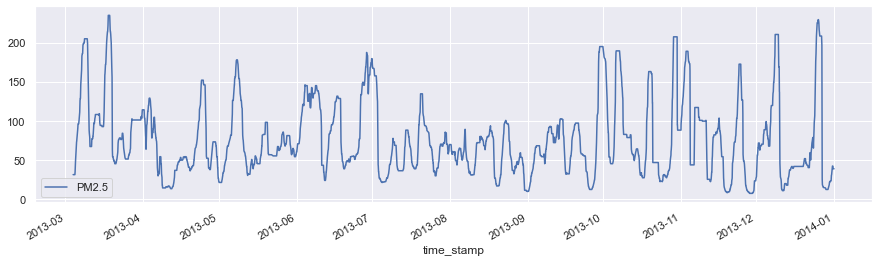

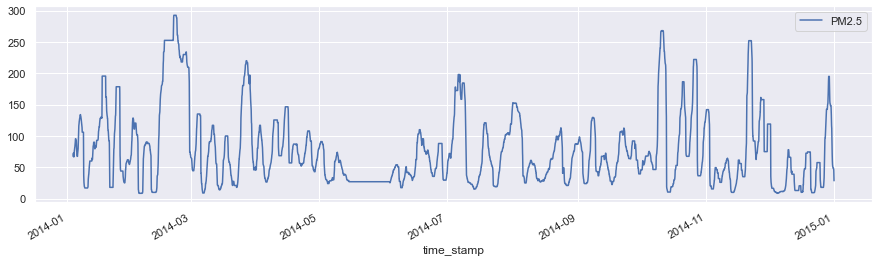

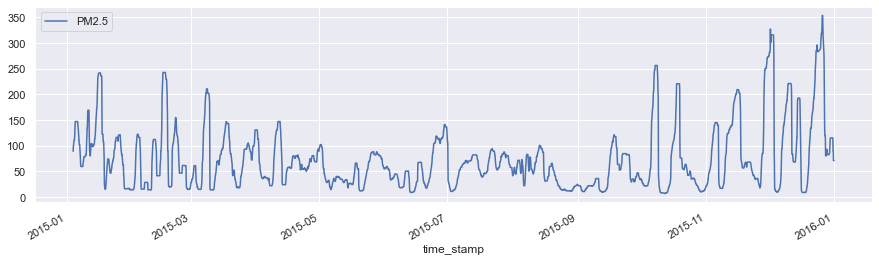

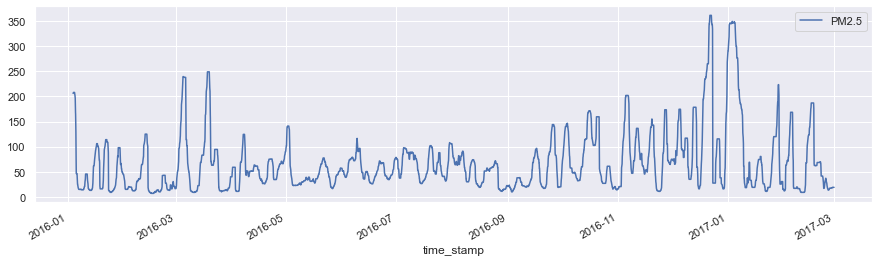

In [3]:
df_tiantan = df[df['station']=='Tiantan']
df_tiantan = df_tiantan.set_index('time_stamp')

sns.set(rc={'figure.figsize':(8, 10)})
df_2013 = df_tiantan.loc[(df_tiantan.index >= '2013-01-01 00:00:00') & (df_tiantan.index < '2014-01-01 00:00:00')]
df_2014 = df_tiantan.loc[(df_tiantan.index >= '2014-01-01 00:00:00') & (df_tiantan.index < '2015-01-01 00:00:00')]
df_2015 = df_tiantan.loc[(df_tiantan.index >= '2015-01-01 00:00:00') & (df_tiantan.index < '2016-01-01 00:00:00')]
df_2016 = df_tiantan.loc[df_tiantan.index >= '2016-01-01 00:00:00']

df_2013[["PM2.5"]].rolling(24*3).median().plot(figsize=(15,4))
df_2014[["PM2.5"]].rolling(24*3).median().plot(figsize=(15,4))
df_2015[["PM2.5"]].rolling(24*3).median().plot(figsize=(15,4))
df_2016[["PM2.5"]].rolling(24*3).median().plot(figsize=(15,4))